In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [9]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [10]:
univariate_column_label=['DEWIHOBT9_I0','AEDAHO_T9_V2','AEWIHO_T9AV2']

In [11]:
size_column = len(univariate_column_label)
print(size_column)

3


In [12]:
univariate_data=test_new.iloc[2000:7000][univariate_column_label]
univariate_data=univariate_data.loc[::-1]
print(univariate_data.head())

                     DEWIHOBT9_I0  AEDAHO_T9_V2  AEWIHO_T9AV2
dateTime                                                     
2019-04-06 00:21:00         100.0     72.427071     76.598087
2019-04-06 00:22:00         100.0     71.620643     76.358689
2019-04-06 00:23:00         100.0     70.606738     77.241097
2019-04-06 00:24:00         100.0     70.531626     77.062413
2019-04-06 00:25:00         100.0     70.692115     76.297974


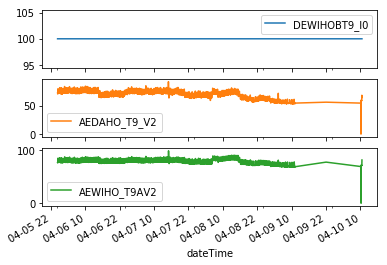

In [13]:
ax = univariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [14]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in univariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [15]:
if zero_index.size > 0:
    univariate_data_modify = univariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    univariate_data_modify = univariate_data

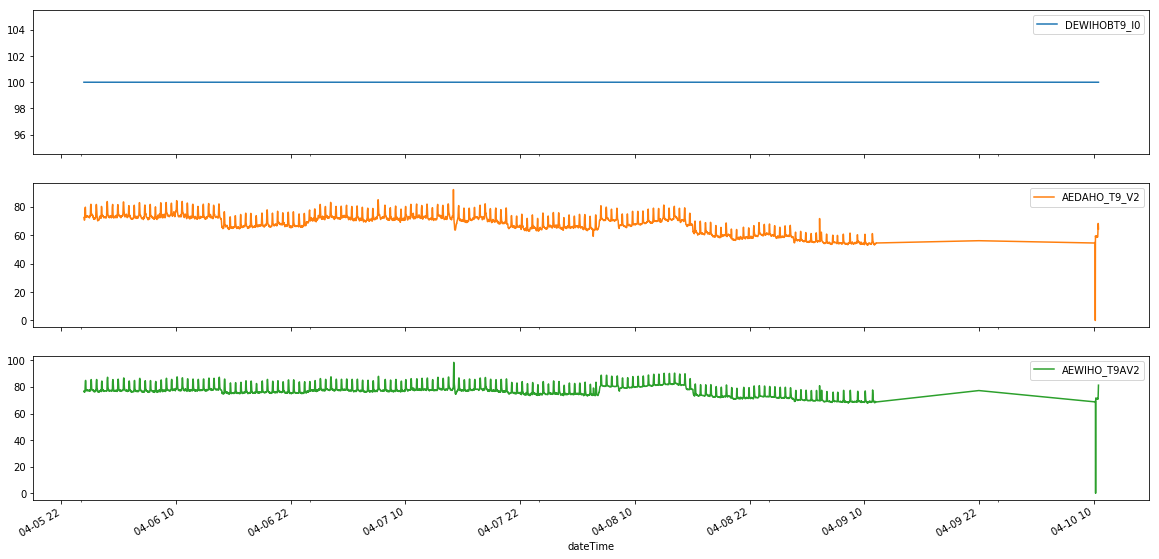

In [16]:
bx = univariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [17]:
univariate_data_1= univariate_data_modify.drop(['DEWIHOBT9_I0','AEWIHO_T9AV2'], axis=1)
univariate_data_2= univariate_data_modify.drop(['DEWIHOBT9_I0','AEDAHO_T9_V2'], axis=1)

In [18]:
print('univariate_data_1 head: \n',univariate_data_1.head())
print('univariate_data_2 head: \n',univariate_data_2.head())

univariate_data_1 head: 
                      AEDAHO_T9_V2
dateTime                         
2019-04-06 00:21:00     72.427071
2019-04-06 00:22:00     71.620643
2019-04-06 00:23:00     70.606738
2019-04-06 00:24:00     70.531626
2019-04-06 00:25:00     70.692115
univariate_data_2 head: 
                      AEWIHO_T9AV2
dateTime                         
2019-04-06 00:21:00     76.598087
2019-04-06 00:22:00     76.358689
2019-04-06 00:23:00     77.241097
2019-04-06 00:24:00     77.062413
2019-04-06 00:25:00     76.297974


In [19]:
from numpy import nan
univariate_data_drop_zero_1 = univariate_data_1.replace(0,nan)
univariate_data_drop_zero_1 = univariate_data_drop_zero_1.dropna(how='any',axis=0)

univariate_data_drop_zero_2 = univariate_data_2.replace(0,nan)
univariate_data_drop_zero_2 = univariate_data_drop_zero_2.dropna(how='any',axis=0)

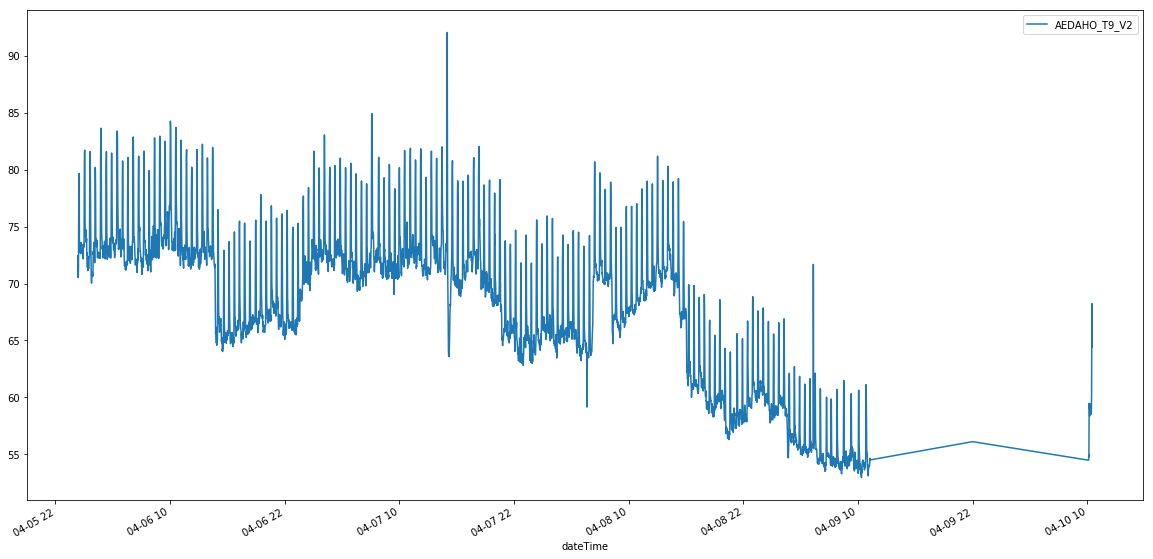

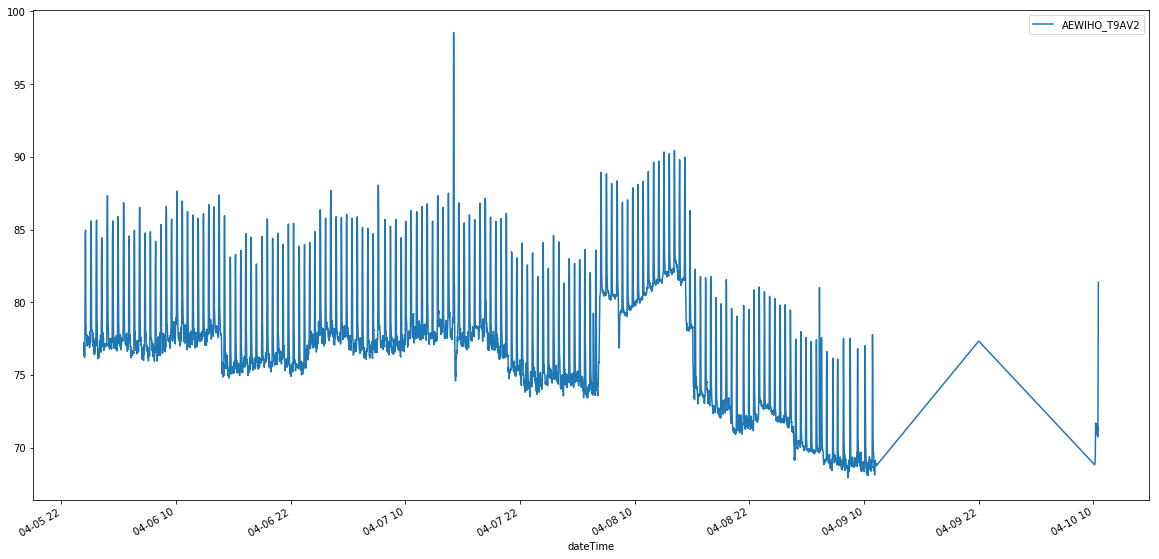

In [20]:
cx = univariate_data_drop_zero_1.plot()
dx = univariate_data_drop_zero_2.plot()
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [38]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_data_conv, test_data_conv = make_dataset(univariate_data_drop_zero_2)
print('train_data_conv shape: ', train_data_conv.shape)
print('test_data_conv shape: ', test_data_conv.shape)

dataset length:  4999
Number of Elements for training:  4499
train_data_conv shape:  (4499, 1)
test_data_conv shape:  (500, 1)


In [39]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

In [40]:
# split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [41]:
n_steps_1 = 4
# split into samples
X_conv_LSTM, y_conv_LSTM = split_sequence(train_data_conv, n_steps_1)

In [42]:
print('X_conv_LSTM shape: ', X_conv_LSTM.shape)
print('y_conv_LSTM shape: ', y_conv_LSTM.shape)

X_conv_LSTM shape:  (4495, 4, 1)
y_conv_LSTM shape:  (4495, 1)


In [43]:
n_features = X_conv_LSTM.shape[-1]
n_seq = 2
n_steps_2 = 2
n_rows=1
X_conv_LSTM_train = X_conv_LSTM.reshape((X_conv_LSTM.shape[0], n_seq, n_rows, n_steps_2, n_features))

In [44]:
print('X_conv_LSTM shape: ',X_conv_LSTM.shape,'\tX_conv_LSTM size: ',X_conv_LSTM.size,'\tX_conv_LSTM dimension: ',X_conv_LSTM.ndim)
print('X_conv_LSTM_train shape: ',X_conv_LSTM_train.shape,'\tX_conv_LSTM_train size: ',X_conv_LSTM_train.size,'\tX_conv_LSTM_train dimension: ',X_conv_LSTM_train.ndim)

X_conv_LSTM shape:  (4495, 4, 1) 	X_conv_LSTM size:  17980 	X_conv_LSTM dimension:  3
X_conv_LSTM_train shape:  (4495, 2, 1, 2, 1) 	X_conv_LSTM_train size:  17980 	X_conv_LSTM_train dimension:  5


In [45]:
# define model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps_2, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
train_model=model.fit(X_conv_LSTM_train, y_conv_LSTM, batch_size=batch_size, epochs=epochs, verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/conv_LSTM_norm_100.h5', save_best_only=True)])

Epoch 1/30
4495/4495 [==============================] - 1s 298us/step - loss: 426.5787
Epoch 2/30
1344/4495 [=======>......................] - ETA: 0s - loss: 5.6635

C:\Users\atif\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4495/4495 [==============================] - 1s 122us/step - loss: 5.6021
Epoch 3/30
4495/4495 [==============================] - 1s 120us/step - loss: 5.5930
Epoch 4/30
4495/4495 [==============================] - 1s 118us/step - loss: 5.5105
Epoch 5/30
4495/4495 [==============================] - 1s 117us/step - loss: 5.4390
Epoch 6/30
4495/4495 [==============================] - 1s 155us/step - loss: 5.3728
Epoch 7/30
4495/4495 [==============================] - 1s 160us/step - loss: 5.3289
Epoch 8/30
4495/4495 [==============================] - 1s 150us/step - loss: 5.2136
Epoch 9/30
4495/4495 [==============================] - 1s 145us/step - loss: 4.9057
Epoch 10/30
4495/4495 [==============================] - 1s 129us/step - loss: 4.7850 0s - lo
Epoch 11/30
4495/4495 [==============================] - 1s 153us/step - loss: 4.4397
Epoch 12/30
4495/4495 [==============================] - 1s 147us/step - loss: 4.4245
Epoch 13/30
4495/4495 [==============================] - 1s 168us

In [46]:
X_conv_LSTM_test, y_conv_LSTM_test = split_sequence(test_data_conv, n_steps_1)
n_feature_test = X_conv_LSTM_test.shape[-1]
x_input = X_conv_LSTM_test.reshape((X_conv_LSTM_test.shape[0], n_seq, 1, n_steps_2, n_feature_test ))

print('x_input shape: ', x_input.shape)

x_input shape:  (496, 2, 1, 2, 1)


In [47]:
yhat = model.predict(x_input, verbose=1)

496/496 [==============================] - 0s 306us/step


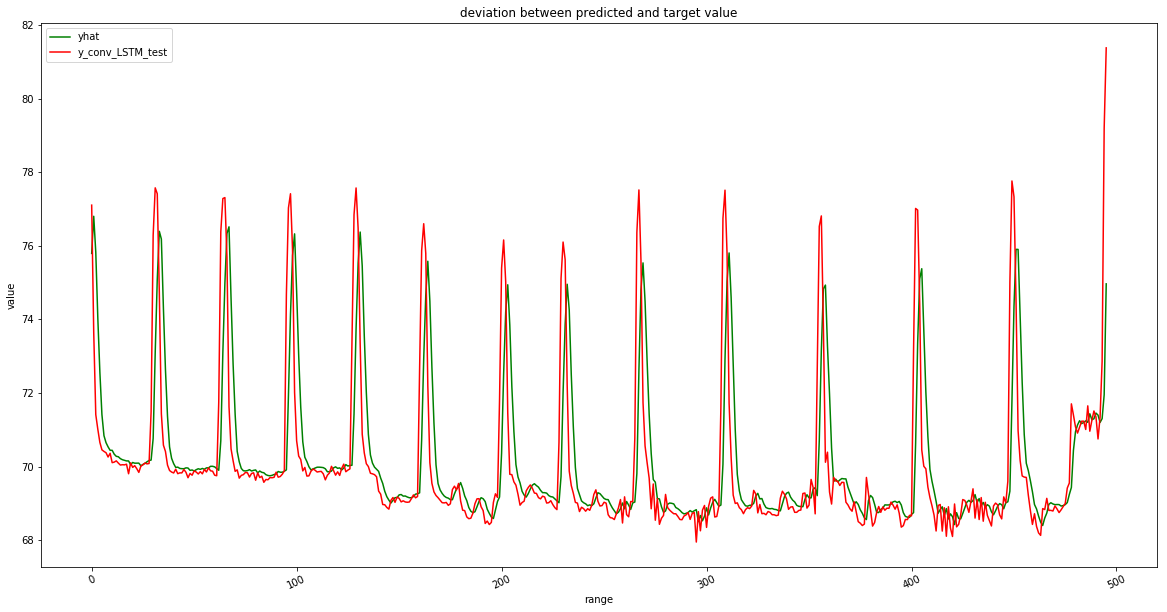

In [48]:
plt.plot(yhat,color='green')
plt.plot(y_conv_LSTM_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat', 'y_conv_LSTM_test'], loc='upper left')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(y_conv_LSTM_test,yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

mean squared error:  2.935876943039995
RMSE Error:  1.7134400902978764
